In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
import plotly.express as px

import folium 
from folium.plugins import HeatMap



In [2]:

data = pd.read_csv('/Users/sevgiyazici/Airline Dataset Updated - v2.csv')

In [3]:
data.head(10)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
5,nMJKVh,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
6,8IPFPE,Rand,Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Stanislas Tiffin,Cancelled
7,pqixbY,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,04-07-2022,STM,Sharyl Eastmead,Cancelled
8,QNAs2R,Aleda,Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time
9,3jmudz,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,04-06-2022,YVG,Alameda Carlyle,On Time


In [4]:
data.shape    

(98619, 15)

In [5]:
#15 sütunlu 98619 girişimiz var.We have 98619 entrances with 15 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
data.isnull().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
dtype: int64

In [8]:
#Veri kümesinde hiç boş değerimiz yok.- # We have no empty values in the data set.

# Data Cleaning

In [9]:
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [10]:
data = data.drop(['First Name', 'Last Name', 'Passenger ID'], axis = 1)

In [11]:
data.head()

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


# Exploratory Data Analysis

In [12]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
data1 = data['Gender'].value_counts().reset_index()


In [14]:
data1

,Gender,count
0,Male,49598
1,Female,49021


In [15]:
#We have total no. of Males = 49598 & total no. of Females = 49021 
#Toplam Erkek sayımız = 49598 ve toplam Kadın sayımız = 49021

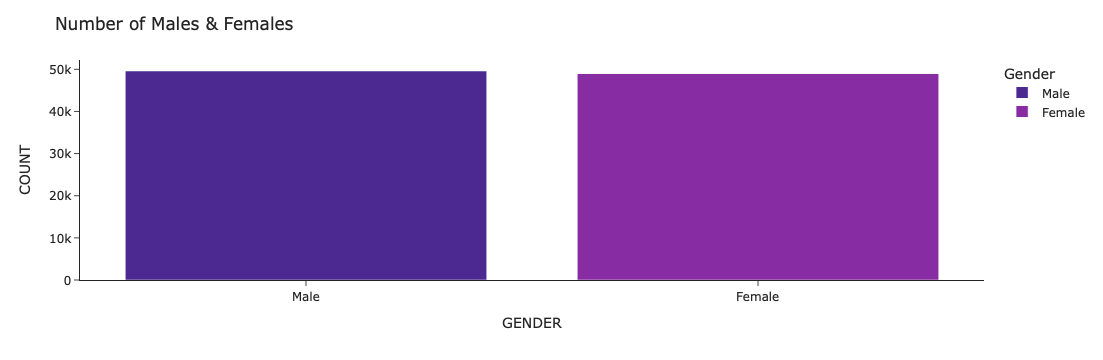

In [17]:
import plotly.express as px

# Bar plot için verilerin hazırlanması
fig = px.bar(
    data1, 
    x='Gender', 
    y='count', 
    color='Gender', 
    color_discrete_sequence=px.colors.sequential.Agsunset,  # Renk paleti
    template='simple_white'  # Arka planı açık yapmak için
)

# Başlıklar ve eksen etiketlerini düzenleme
fig.update_layout(
    title_text='Number of Males & Females',
    xaxis_title='GENDER',
    yaxis_title='COUNT',
    plot_bgcolor='rgba(0,0,0,0)',  # Grafik alanının arka planı şeffaf
    paper_bgcolor='rgba(0,0,0,0)'  # Kağıt arka planını da şeffaf yapar
)

# Grafiği gösterme
fig.show()

In [18]:
data['Nationality'].unique()

array(['Japan', 'Nicaragua', 'Russia', 'China', 'Brazil', 'Ivory Coast',
       'Vietnam', 'Palestinian Territory', 'Thailand', 'Tunisia',
       'Sweden', 'Colombia', 'Greece', 'Philippines', 'Ukraine',
       'Indonesia', 'Croatia', 'Democratic Republic of the Congo',
       'France', 'Peru', 'Latvia', 'Germany', 'Czech Republic', 'Ireland',
       'Iran', 'Madagascar', 'United States', 'Ghana', 'Mali',
       'Guatemala', 'Kyrgyzstan', 'Haiti', 'Afghanistan', 'Ethiopia',
       'Tanzania', 'Nigeria', 'Cameroon', 'Morocco', 'Armenia', 'Mexico',
       'Chile', 'Albania', 'Luxembourg', 'Honduras', 'Portugal',
       'Kazakhstan', 'Pakistan', 'Poland', 'South Africa', 'Kenya',
       'Serbia', 'Maldives', 'Argentina', 'Uruguay', 'Netherlands',
       'Botswana', 'Egypt', 'Syria', 'Myanmar', 'Slovenia', 'Spain',
       'Macedonia', 'Mongolia', 'Yemen', 'Benin', 'Laos', 'Norway',
       'Sao Tome and Principe', 'Venezuela', 'United Kingdom', 'Denmark',
       'Dominican Republic', 'North

In [19]:
data['Nationality'].nunique()  #benzersiz 240 

240

In [20]:
nation_count = data['Nationality'].value_counts().reset_index()

In [21]:
nation_count

,Nationality,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
...,...,...
235,Romania,2
236,British Virgin Islands,2
237,Jersey,1
238,Norfolk Island,1


In [22]:
top10_countries =nation_count.nlargest(10,'count') 
top10_countries.reset_index()
top10_countries

,Nationality,count
0,China,18317
1,Indonesia,10559
2,Russia,5693
3,Philippines,5239
4,Brazil,3791
5,Portugal,3299
6,Poland,3245
7,France,2907
8,Sweden,2397
9,United States,2105


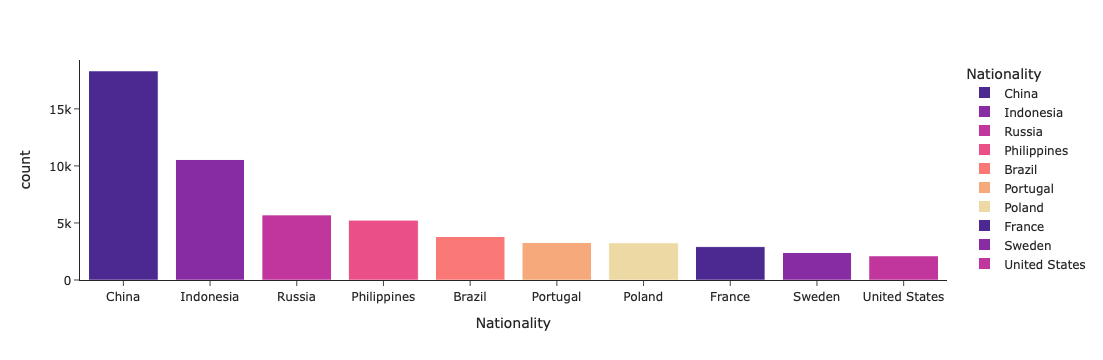

In [23]:

# Let's visualise top 10 Nationalities 
px.bar(top10_countries, x='Nationality', y = 'count',color='Nationality',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'simple_white')

In [24]:
top10_countries_low = nation_count.nsmallest(10, 'count')
top10_countries_low.reset_index(drop=True, inplace=True)
top10_countries_low

,Nationality,count
0,Jersey,1
1,Norfolk Island,1
2,Sint Maarten,1
3,French Southern Territories,2
4,Svalbard and Jan Mayen,2
5,Saint Helena,2
6,Macao,2
7,Saint Martin,2
8,Cook Islands,2
9,Cocos Islands,2


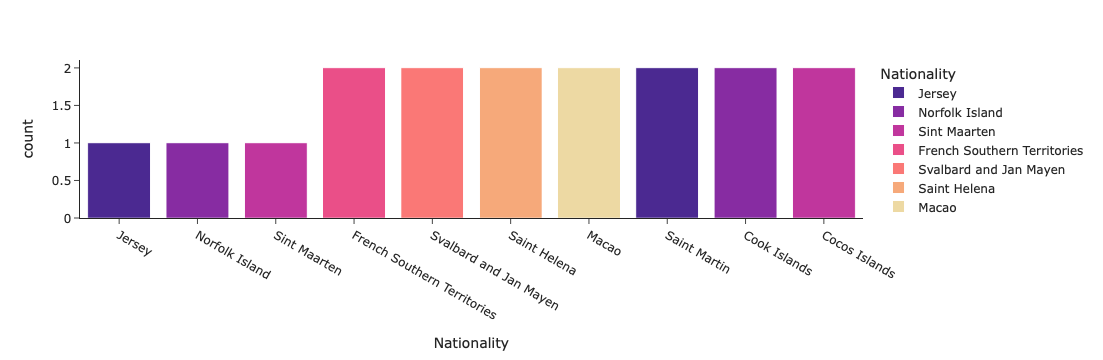

In [25]:

# Let's visualise top 10 Nationalities 
px.bar(top10_countries_low, x='Nationality', y = 'count',color='Nationality',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'simple_white')

In [26]:
data.columns

Index(['Gender', 'Age', 'Nationality', 'Airport Name', 'Airport Country Code',
       'Country Name', 'Airport Continent', 'Continents', 'Departure Date',
       'Arrival Airport', 'Pilot Name', 'Flight Status'],
      dtype='object')

In [27]:
data['Airport Name'].unique()

array(['Coldfoot Airport', 'Kugluktuk Airport', 'Grenoble-Isère Airport',
       ..., 'Camaxilo Airport', 'Babelthuap Airport',
       'Westchester County Airport'], dtype=object)

In [28]:
data['Airport Name'].nunique()

9062

In [29]:
#There are 9062 unique airport entrances where passengers operate the flight.
#Yolcuların uçuşu gerçekleştirdiği 9062 benzersiz havaalanı girişi bulunmaktadır.


In [30]:
airport_name = data['Airport Name'].value_counts().reset_index()
airport_name

,Airport Name,count
0,San Pedro Airport,43
1,Santa Maria Airport,38
2,Böblingen Flugfeld,36
3,Santa Ana Airport,35
4,San Fernando Airport,31
...,...,...
9057,Balıkesir Merkez Airport,2
9058,Arkalyk North Airport,2
9059,Juba International Airport,2
9060,Falcon State Airport,1


In [31]:
#Getting the top 10 airports with the highest number of passengers
#En fazla yolcuya sahip ilk 10 havalimanına ulaşmak


In [32]:
top10_airport = airport_name.nlargest(10,'count')
top10_airport

,Airport Name,count
0,San Pedro Airport,43
1,Santa Maria Airport,38
2,Böblingen Flugfeld,36
3,Santa Ana Airport,35
4,San Fernando Airport,31
5,Mae Hong Son Airport,29
6,Capital City Airport,28
7,Cochrane Airport,28
8,Santa Rosa Airport,28
9,Bathurst Airport,27


In [33]:
top10_airport = airport_name.nlargest(10,'count')
top10_airport

,Airport Name,count
0,San Pedro Airport,43
1,Santa Maria Airport,38
2,Böblingen Flugfeld,36
3,Santa Ana Airport,35
4,San Fernando Airport,31
5,Mae Hong Son Airport,29
6,Capital City Airport,28
7,Cochrane Airport,28
8,Santa Rosa Airport,28
9,Bathurst Airport,27


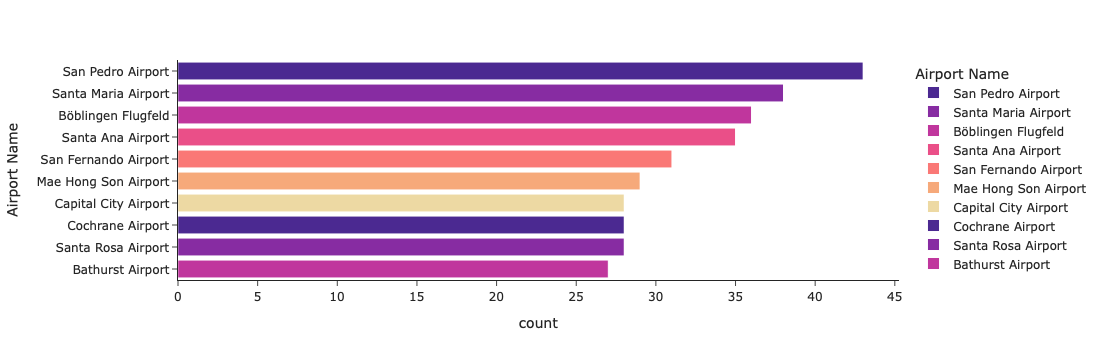

In [34]:

px.bar(top10_airport,x='count',y='Airport Name',color='Airport Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'simple_white')

In [35]:
# Getting the top 10 airports with the lowest number of passengers
# En düşük yolcu sayısına sahip ilk 10 havalimanını belirleme


In [36]:
bottom10_airport = airport_name.nsmallest(10, 'count')
bottom10_airport

,Airport Name,count
9060,Falcon State Airport,1
9061,Hiroshima Airport,1
9051,Camaxilo Airport,2
9052,Mount Gambier Airport,2
9053,J F Mitchell Airport,2
9054,Kar Kar Airport,2
9055,Smolensk North Airport,2
9056,San Luis Airport,2
9057,Balıkesir Merkez Airport,2
9058,Arkalyk North Airport,2


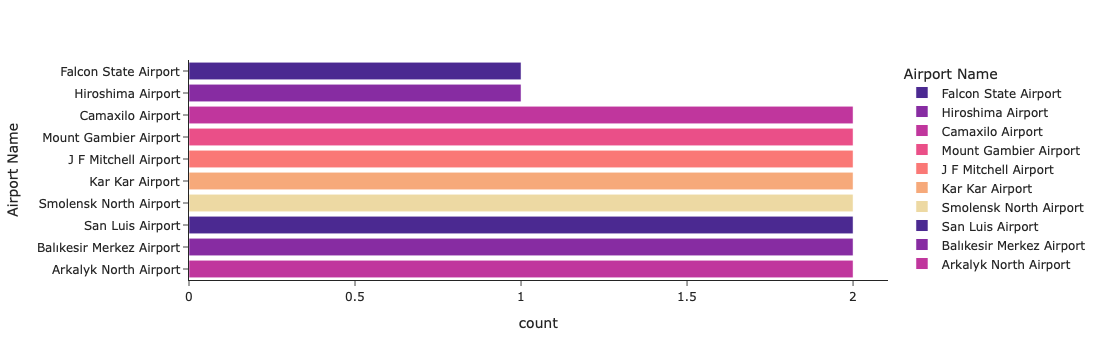

In [37]:

px.bar(bottom10_airport,x='count',y='Airport Name',color='Airport Name',color_discrete_sequence=px.colors.sequential.Agsunset  ,template = 'simple_white')

In [38]:
data.columns

Index(['Gender', 'Age', 'Nationality', 'Airport Name', 'Airport Country Code',
       'Country Name', 'Airport Continent', 'Continents', 'Departure Date',
       'Arrival Airport', 'Pilot Name', 'Flight Status'],
      dtype='object')

In [39]:
data['Airport Country Code'].unique()

array(['US', 'CA', 'FR', 'BR', 'GB', 'IT', 'MX', 'PA', 'PK', 'AU', 'ZA',
       'VE', 'CN', 'MG', 'CO', 'MR', 'MM', 'CG', 'ZM', 'WS', 'NC', 'GQ',
       'PG', 'BS', 'ID', 'RU', 'BO', 'KE', 'BF', 'GT', 'TW', 'IN', 'NO',
       'CR', 'PT', 'LK', 'PF', 'MZ', 'DZ', 'NP', 'BG', 'IR', 'HN', 'SD',
       'JP', 'DO', 'IS', 'VN', 'SY', 'RO', 'KY', 'DE', 'SK', 'BW', 'SA',
       'EC', 'CM', 'MN', 'DM', 'PY', 'IL', 'HR', 'AR', 'VU', 'NZ', 'CD',
       'UA', 'SE', 'NI', 'MY', 'ET', 'PL', 'CU', 'ES', 'KH', 'OM', 'PE',
       'GY', 'UY', 'MA', 'EE', 'KW', 'GR', 'SN', 'GA', 'SO', 'CI', 'FK',
       'SB', 'ZW', 'GD', 'CL', 'VI', 'MH', 'JM', 'PH', 'SR', 'PR', 'WF',
       'TN', 'TR', 'HU', 'TZ', 'SI', 'TO', 'AO', 'AF', 'LS', 'EG', 'LY',
       'MW', 'CV', 'NL', 'MO', 'LR', 'KI', 'TH', 'LA', 'MP', 'CH', 'AT',
       'TG', 'AZ', 'NF', 'YE', 'JO', 'NG', 'BZ', 'UG', 'RW', 'MV', 'KR',
       'FO', 'LT', 'FM', 'FI', 'UM', 'ER', 'TL', 'FJ', 'EH', 'DK', 'BD',
       'BY', 'TM', 'MF', 'PS', 'CY', 'TV', 'CZ', 'C

In [40]:
data['Airport Country Code'].nunique()

235

In [41]:
Unique_Country= data['Airport Country Code'].nunique()
print(f"Benzersiz ülke kodu sayısı: {Unique_Country}")

Benzersiz ülke kodu sayısı: 235


In [47]:
country_counts = data['Airport Country Code'].value_counts()
print(country_counts.head(10))  

Airport Country Code
US    22104
AU     6370
CA     5424
BR     4504
PG     4081
CN     2779
ID     2358
RU     2247
CO     1643
IN     1486
Name: count, dtype: int64


In [ ]:
# Top 10 countries with the most airports
# En çok havaalanı bulunan ilk 10 ülke

In [48]:
data['Airport Country Code'].isnull().sum()


0

In [54]:
data.columns

Index(['Gender', 'Age', 'Nationality', 'Airport Name', 'Airport Country Code',
       'Country Name', 'Airport Continent', 'Continents', 'Departure Date',
       'Arrival Airport', 'Pilot Name', 'Flight Status'],
      dtype='object')

In [55]:
data['Country Name'].nunique()

235

In [57]:
data['Country Name'].value_counts().reset_index()

,Country Name,count
0,United States,22104
1,Australia,6370
2,Canada,5424
3,Brazil,4504
4,Papua New Guinea,4081
...,...,...
230,Andorra,7
231,Monaco,7
232,Nauru,7
233,Palau,5


In [72]:
top10_countries = data['Country Name'].value_counts().head(10).reset_index()
top10_countries.columns = ['Country Name', 'Count']

/var/folders/2v/b_0slg4d2zbgn1sm5ykpp20h0000gn/T/ipykernel_25883/3670749565.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




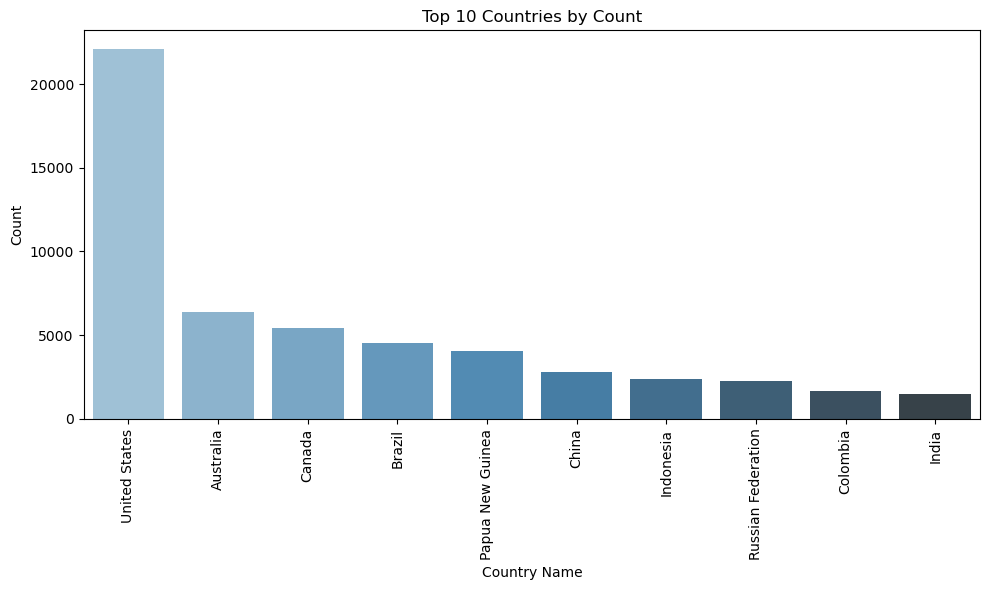

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seaborn ile görselleştirme
plt.figure(figsize=(10,6))
sns.barplot(x='Country Name', y='Count', data=top10_countries, palette='Blues_d')
plt.xticks(rotation=90)
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.title('Top 10 Countries by Count')
plt.tight_layout()
plt.show()

In [75]:
data.columns

Index(['Gender', 'Age', 'Nationality', 'Airport Name', 'Airport Country Code',
       'Country Name', 'Airport Continent', 'Continents', 'Departure Date',
       'Arrival Airport', 'Pilot Name', 'Flight Status'],
      dtype='object')

### Continent

In [87]:
continent= data['Continents'].value_counts().reset_index()
continent

,Continents,count
0,North America,32033
1,Asia,18637
2,Oceania,13866
3,Europe,12335
4,Africa,11030
5,South America,10718


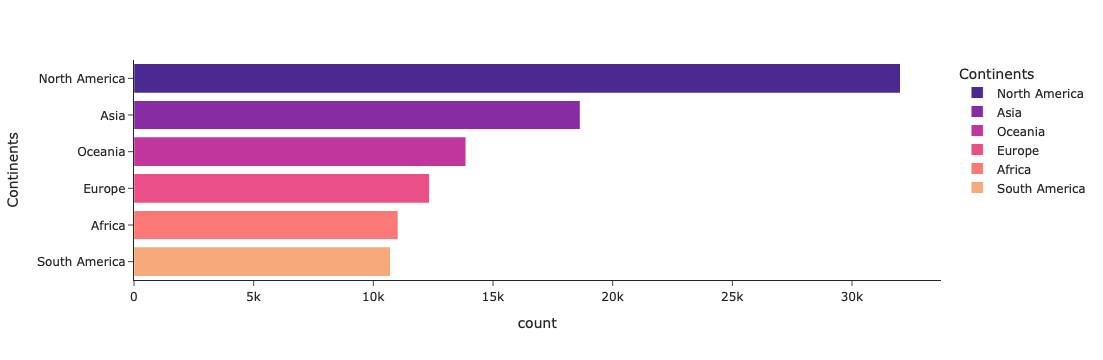

In [90]:

# Plotting the continents passenger count
px.bar(continent,x='count',y='Continents',color='Continents',color_discrete_sequence=px.colors.sequential.Agsunset 
       ,template = 'simple_white')

In [91]:
data.head(10)

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
5,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
6,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Stanislas Tiffin,Cancelled
7,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,04-07-2022,STM,Sharyl Eastmead,Cancelled
8,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time
9,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,04-06-2022,YVG,Alameda Carlyle,On Time


In [96]:
statuss=data['Flight Status'].value_counts().reset_index()
statuss

,Flight Status,count
0,Cancelled,32942
1,On Time,32846
2,Delayed,32831


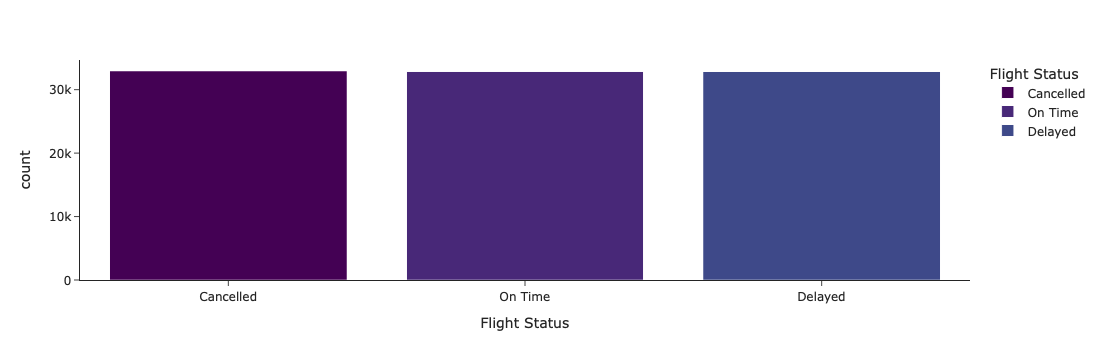

In [98]:
#Visualisation
#Görselleştirme

px.bar(statuss,x='Flight Status',y='count',color='Flight Status',color_discrete_sequence=px.colors.sequential.Viridis,template = 'simple_white')

In [ ]:
#Rakamlar hemen hemen birbirine çok yakın 
#The numbers are almost too close together 

In [ ]:
#Kıta bazında gecikme Analizi yapalım 
#Let's analyse delay by continent 

In [102]:
data['Continents'].value_counts()

Continents
North America    32033
Asia             18637
Oceania          13866
Europe           12335
Africa           11030
South America    10718
Name: count, dtype: int64

In [104]:

N_America =data[data['Continents'] == 'North America']
N_America

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
3,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
9,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,04-06-2022,YVG,Alameda Carlyle,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...
98597,Female,38,Peru,Fort Chipewyan Airport,CA,Canada,NAM,North America,01-10-2022,YPY,Verile Arlett,On Time
98604,Female,47,Brazil,St Cloud Regional Airport,US,United States,NAM,North America,02-08-2022,STC,Vachel Keddey,On Time
98605,Female,7,China,Newport Municipal Airport,US,United States,NAM,North America,09-07-2022,ONP,Hercules Shurmore,On Time
98608,Female,24,Chile,Luis Munoz Marin International Airport,PR,Puerto Rico,NAM,North America,3/23/2022,SJU,Michael McNabb,Cancelled


In [105]:
Status_N_america=N_America ['Flight Status'].value_counts().reset_index()
Status_N_america

,Flight Status,count
0,Delayed,10696
1,Cancelled,10693
2,On Time,10644


In [106]:
Asia =data[data['Continents'] == 'Asia'] 
Asia

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
12,Female,47,Sweden,Loralai Airport,PK,Pakistan,AS,Asia,3/19/2022,LRG,Madelena Lennarde,Delayed
17,Male,12,Greece,Enshi Airport,CN,China,AS,Asia,3/29/2022,ENH,Alfie MacMorland,Delayed
19,Male,62,China,Guilin Liangjiang International Airport,CN,China,AS,Asia,09-05-2022,KWL,Marita Holtom,Cancelled
26,Female,14,Democratic Republic of the Congo,Bagan Airport,MM,Myanmar,AS,Asia,10-03-2022,NYU,Aimil Shakshaft,Delayed
42,Female,56,China,Rar Gwamar Airport,ID,Indonesia,AS,Asia,07-08-2022,DOB,Fowler Desquesnes,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...
98603,Male,39,Haiti,Senipah Heliport,ID,Indonesia,AS,Asia,10-08-2022,SZH,Jordanna Greening,On Time
98609,Female,22,China,Wuzhou Changzhoudao Airport,CN,China,AS,Asia,4/23/2022,WUZ,Hansiain Segot,On Time
98610,Male,83,France,Warangal Airport,IN,India,AS,Asia,08-05-2022,WGC,Moishe Ong,Cancelled
98611,Female,41,Canada,Ipil Airport,PH,Philippines,AS,Asia,06-06-2022,IPE,Gideon Praundl,On Time


In [ ]:
Status_N_america=N_America ['Flight Status'].value_counts().reset_index()
Status_N_america

In [107]:
Status_Asia= Asia ['Flight Status'].value_counts().reset_index()
Status_Asia

,Flight Status,count
0,On Time,6242
1,Cancelled,6235
2,Delayed,6160


In [108]:

Oceania =data[data['Continents'] == 'Oceania'] 
Oceania

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
13,Female,77,Russia,Cudal Airport,AU,Australia,OC,Oceania,3/24/2022,CUG,Margie Beal,Delayed
30,Female,14,China,Faleolo International Airport,WS,Samoa,OC,Oceania,7/22/2022,APW,Micky Luno,Delayed
32,Male,19,Germany,Nesson Airport,NC,New Caledonia,OC,Oceania,3/25/2022,HLU,Dorine Timmermann,Cancelled
35,Male,9,Sweden,Gora Airstrip,PG,Papua New Guinea,OC,Oceania,6/25/2022,GOC,Pamela Franiak,On Time
37,Male,32,China,Moki Airport,PG,Papua New Guinea,OC,Oceania,12/21/2022,MJJ,Dunn MacSkeagan,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...
98538,Male,76,Indonesia,Pimaga Airport,PG,Papua New Guinea,OC,Oceania,12/28/2022,PMP,Pansie Faircley,Delayed
98567,Female,5,Finland,Meekatharra Airport,AU,Australia,OC,Oceania,12-09-2022,MKR,Gena Newcome,Delayed
98580,Male,82,Norway,Kurwina Airport,PG,Papua New Guinea,OC,Oceania,1/29/2022,KWV,Tabb McFade,Cancelled
98589,Female,29,Brazil,Austral Downs Airport,AU,Australia,OC,Oceania,5/29/2022,AWP,Xavier Leon,Cancelled


In [121]:
Status_Oceania = Oceania ['Flight Status'].value_counts().reset_index()
Status_Oceania

,Flight Status,count
0,Delayed,4634
1,Cancelled,4619
2,On Time,4613


In [111]:
Europe=data[data['Continents'] == 'Europe']
Europe

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
2,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
6,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Stanislas Tiffin,Cancelled
8,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Daryn Bardsley,On Time
73,Female,73,Cameroon,Vadsø Airport,NO,Norway,EU,Europe,11/25/2022,VDS,Simmonds Gallihaulk,Cancelled
76,Female,26,Russia,João Paulo II Airport,PT,Portugal,EU,Europe,8/26/2022,PDL,Bertha Piborn,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...
98602,Female,26,Indonesia,Kharkiv International Airport,UA,Ukraine,EU,Europe,08-04-2022,HRK,Reece Fears,On Time
98606,Female,59,Philippines,Foula Airfield,GB,United Kingdom,EU,Europe,8/31/2022,FOA,Tyler Drugan,Cancelled
98614,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98616,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time


In [113]:
Status_europe =Europe ['Flight Status'].value_counts().reset_index()
Status_europe

,Flight Status,count
0,Delayed,4178
1,Cancelled,4095
2,On Time,4062


In [116]:
Africa=data[data['Continents'] == 'Africa']
Africa

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
15,Female,22,China,Oudtshoorn Airport,ZA,South Africa,AF,Africa,7/18/2022,OUH,Neila Giercke,Cancelled
22,Female,45,China,Port Bergé Airport,MG,Madagascar,AF,Africa,8/24/2022,WPB,Stella Pittham,On Time
25,Female,8,Croatia,Timbedra Airport,MR,Mauritania,AF,Africa,2/19/2022,TMD,Janaya Retchford,On Time
28,Female,6,Peru,Gamboma Airport,CG,Congo,AF,Africa,04-09-2022,GMM,Beau Stevens,Delayed
29,Male,35,China,Kasaba Bay Airport,ZM,Zambia,AF,Africa,4/14/2022,ZKB,Fenelia Print,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...
98593,Female,77,Sweden,O R Tambo International,ZA,South Africa,AF,Africa,7/29/2022,JNB,Abie Von Welden,Cancelled
98594,Male,5,Spain,Gao Airport,ML,Mali,AF,Africa,11/18/2022,GAQ,Joice Rives,Cancelled
98595,Male,25,Russia,Sainte Marie Airport,MG,Madagascar,AF,Africa,3/28/2022,SMS,William Arger,Delayed
98615,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled


In [117]:
Status_Africa =Africa ['Flight Status'].value_counts().reset_index()
Status_Africa

,Flight Status,count
0,On Time,3719
1,Cancelled,3657
2,Delayed,3654


In [119]:
S_America=data[data['Continents'] == 'South America']
S_America

,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
5,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,06-10-2022,LEC,Inglis Dolley,On Time
7,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,04-07-2022,STM,Sharyl Eastmead,Cancelled
16,Female,28,Colombia,Zaraza Airport,VE,"Venezuela, Bolivarian Republic of",SAM,South America,9/23/2022,ZRZ,Shaylynn Alcott,On Time
23,Female,29,Indonesia,Hato Corozal Airport,CO,Colombia,SAM,South America,08-06-2022,HTZ,Kaye Clews,Delayed
48,Male,24,Ghana,Arapiraca Airport,BR,Brazil,SAM,South America,4/26/2022,APQ,Lynette Ortelt,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...
98584,Male,56,Malaysia,Caicara del Orinoco Airport,VE,"Venezuela, Bolivarian Republic of",SAM,South America,4/29/2022,CXA,Kaleb Ransom,Cancelled
98585,Male,39,Philippines,Patrocínio Airport,BR,Brazil,SAM,South America,4/21/2022,0,Gabie Popelay,On Time
98586,Male,39,Russia,Laguna Airport,BR,Brazil,SAM,South America,5/29/2022,0,Bryon Willis,Delayed
98588,Male,33,Portugal,San Fernando Airport,AR,Argentina,SAM,South America,3/18/2022,FDO,Oneida Everitt,Delayed


In [ ]:
South America

In [120]:
Status_S_America =S_America ['Flight Status'].value_counts().reset_index()
Status_S_America

,Flight Status,count
0,Cancelled,3643
1,On Time,3566
2,Delayed,3509


In [ ]:
#We observed that

#Most of the Cancelled Flights are from North America
#Most of the delays are from North America
#Most of them are from North America
#Same number of male and female passengers
#North America as a continent and the USA as a country have the highest number of passengers

In [ ]:
#Şunu gözlemledik:

#İptal Edilen Uçuşların Çoğu Kuzey Amerika'dan
#Gecikenlerin çoğu Kuzey Amerika'dan
#Çoğu Zamanında Kuzey Amerika'dan
#Erkek ve kadın yolcu sayısı aynıdır
#Kıta olarak Kuzey Amerika ve ülke olarak ABD en fazla yolcuya sahip ülkelerdir